# Data Exploration: Higgs Boson Dataset

This notebook explores the Higgs boson dataset and visualizes the features.

In [1]:
import sys
sys.path.append('../src')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_loader import load_higgs_data, get_feature_names
from visualization import plot_feature_distributions, plot_feature_correlation

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

%matplotlib inline

## Load Data

Load the Higgs dataset. If the dataset file is not available, synthetic data will be generated.

In [2]:
# Load data (will generate synthetic data if file not found)
X_train, X_test, y_train, y_test = load_higgs_data(
    data_path='../data/HIGGS.csv',
    n_samples=50000,  # Use subset for faster processing
    test_split=0.2,
    random_seed=42
)

feature_names = get_feature_names()

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Number of features: {X_train.shape[1]}")

Loading data from ../data/HIGGS.csv...
Loaded 40000 training samples and 10000 test samples
Number of features: 28
Class distribution - Train: 53.21% signal
Class distribution - Test: 52.82% signal
Training samples: 40000
Test samples: 10000
Number of features: 28


## Dataset Statistics

In [3]:
print("Class Distribution:")
print(f"  Training - Signal: {np.sum(y_train == 1)} ({np.mean(y_train)*100:.2f}%)")
print(f"  Training - Background: {np.sum(y_train == 0)} ({(1-np.mean(y_train))*100:.2f}%)")
print(f"\n  Test - Signal: {np.sum(y_test == 1)} ({np.mean(y_test)*100:.2f}%)")
print(f"  Test - Background: {np.sum(y_test == 0)} ({(1-np.mean(y_test))*100:.2f}%)")

Class Distribution:
  Training - Signal: 21283 (53.21%)
  Training - Background: 18717 (46.79%)

  Test - Signal: 5282 (52.82%)
  Test - Background: 4718 (47.18%)


## Feature Distributions

Compare feature distributions between signal and background events.

In [4]:
# Separate signal and background
X_signal = X_train[y_train == 1]
X_background = X_train[y_train == 0]

print(f"Signal samples: {len(X_signal)}")
print(f"Background samples: {len(X_background)}")

Signal samples: 21283
Background samples: 18717


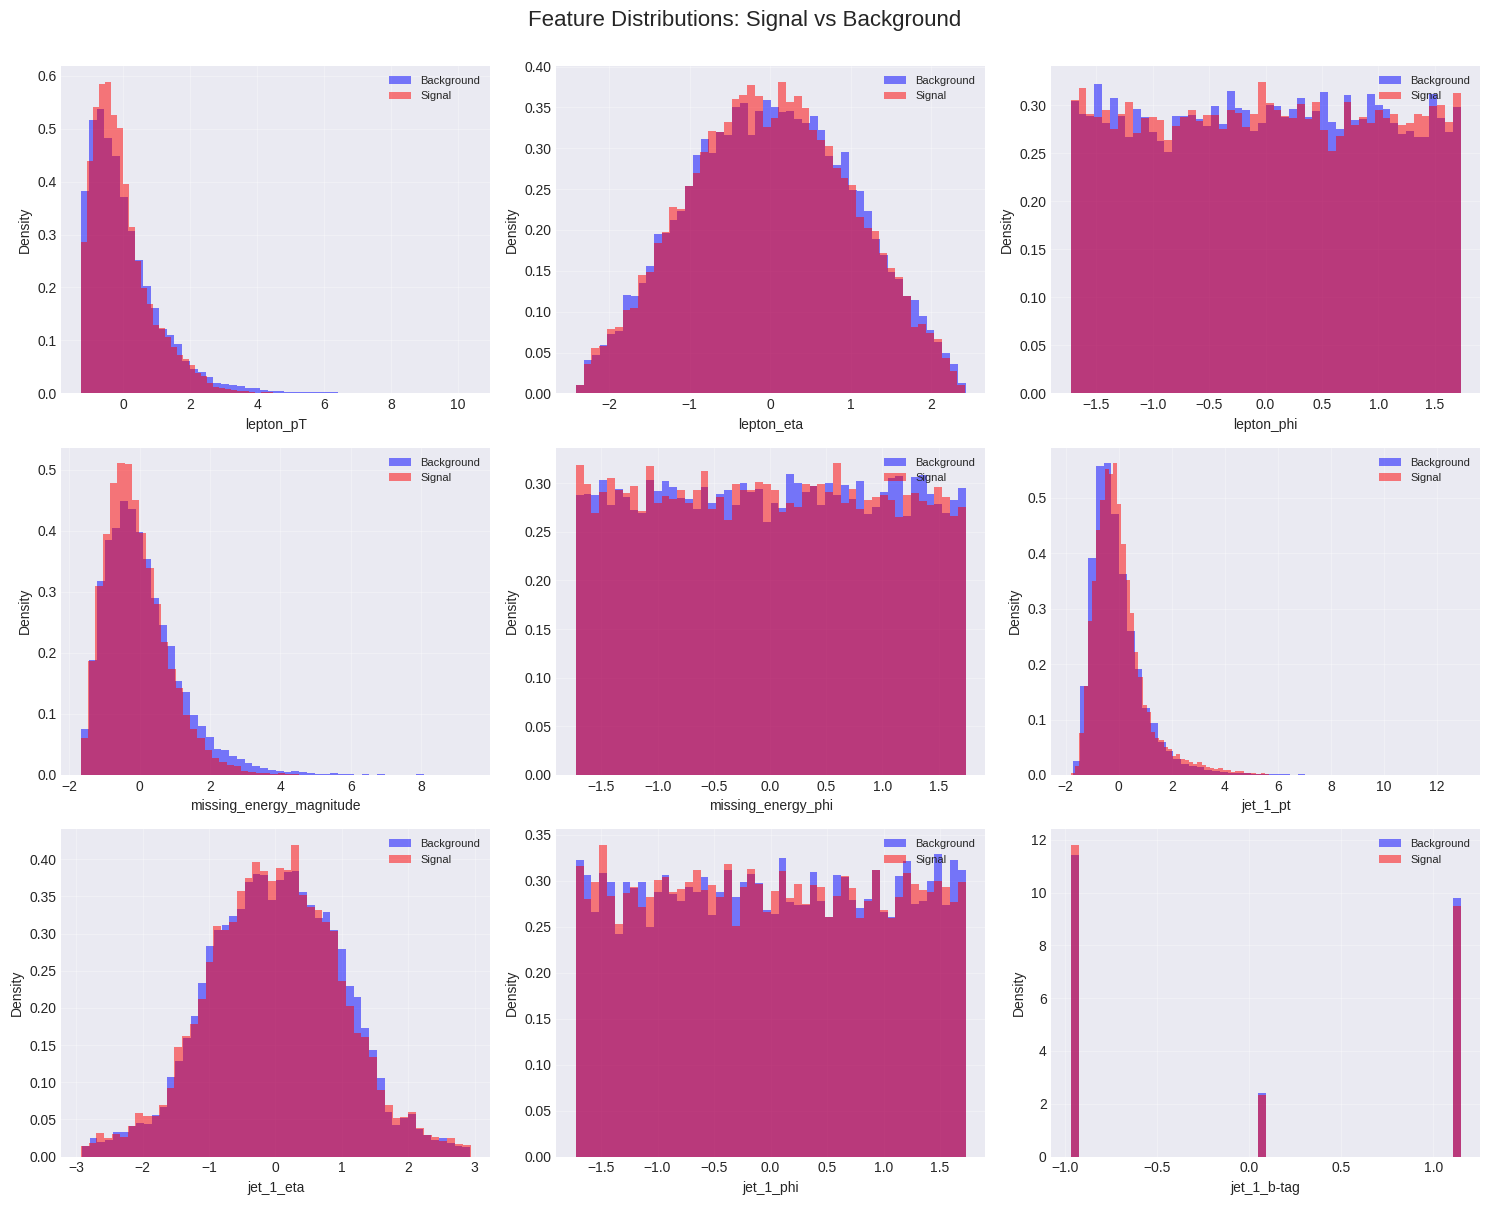

In [5]:
# Plot feature distributions for first 9 features
plot_feature_distributions(
    X_signal, 
    X_background, 
    feature_names, 
    n_features=9,
    save_path='../figures/feature_distributions_1.png'
)

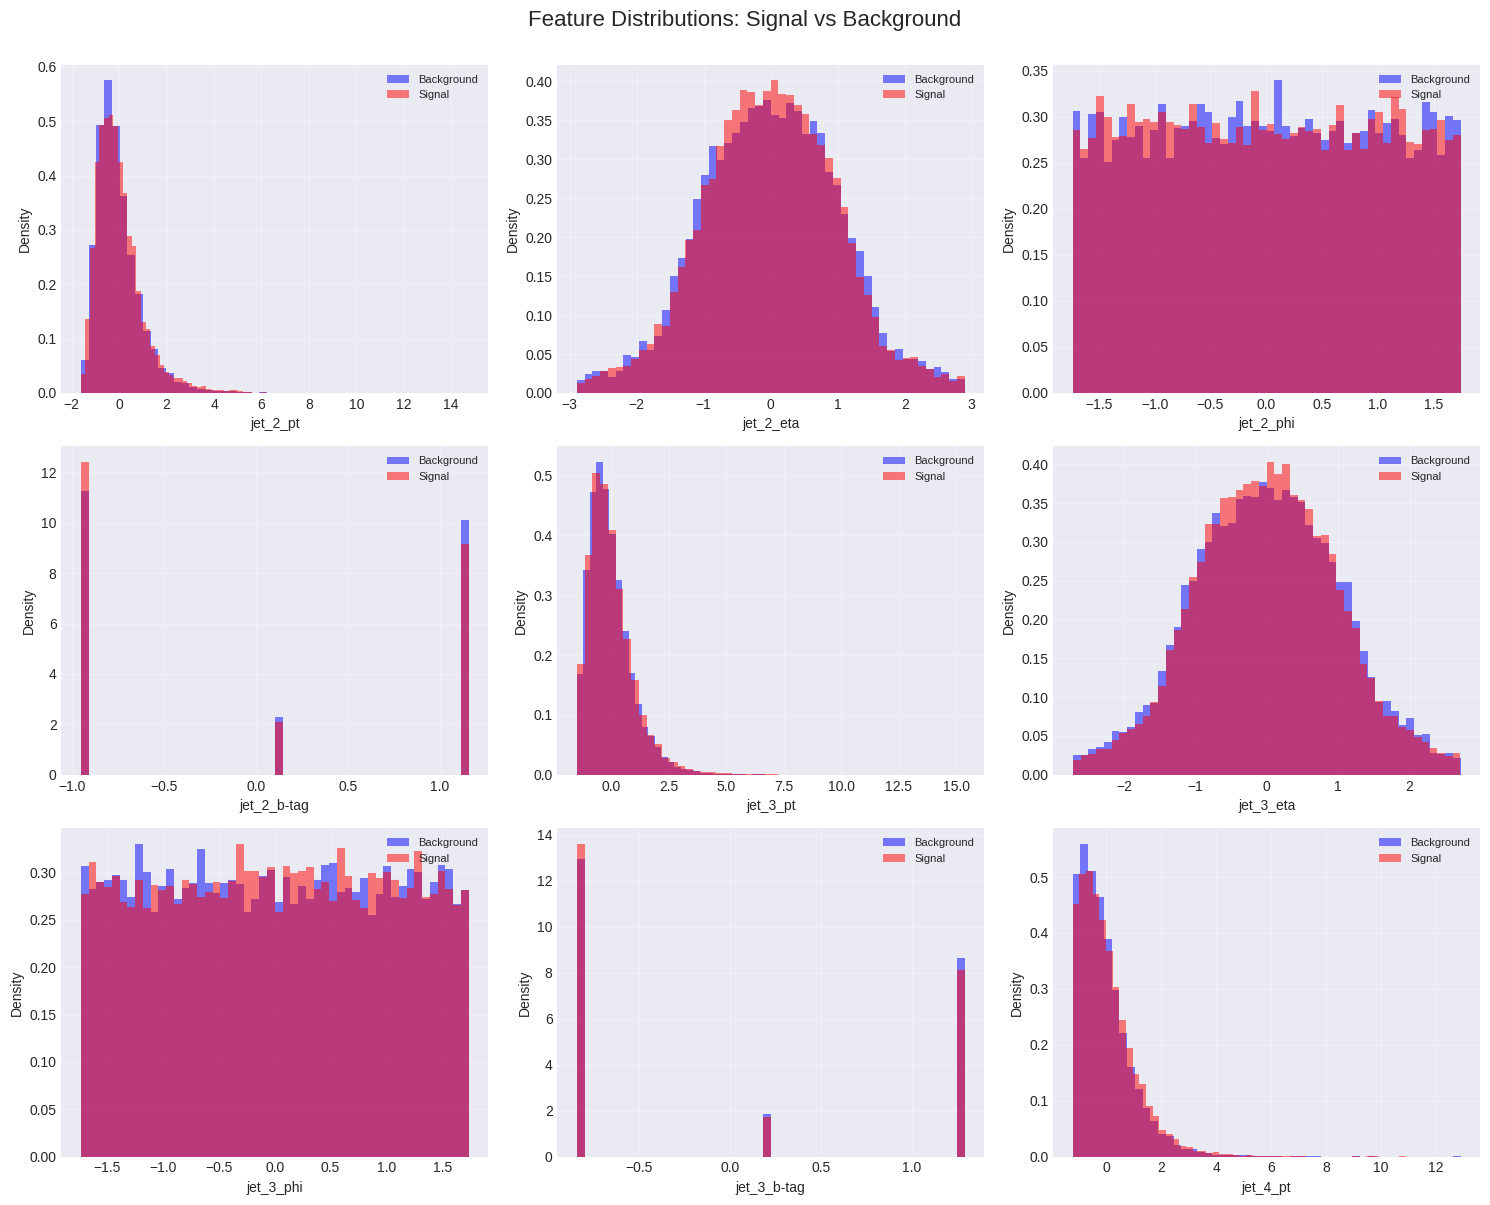

In [6]:
# Plot feature distributions for next 9 features
plot_feature_distributions(
    X_signal[:, 9:18], 
    X_background[:, 9:18], 
    feature_names[9:18], 
    n_features=9,
    save_path='../figures/feature_distributions_2.png'
)

## Feature Correlations

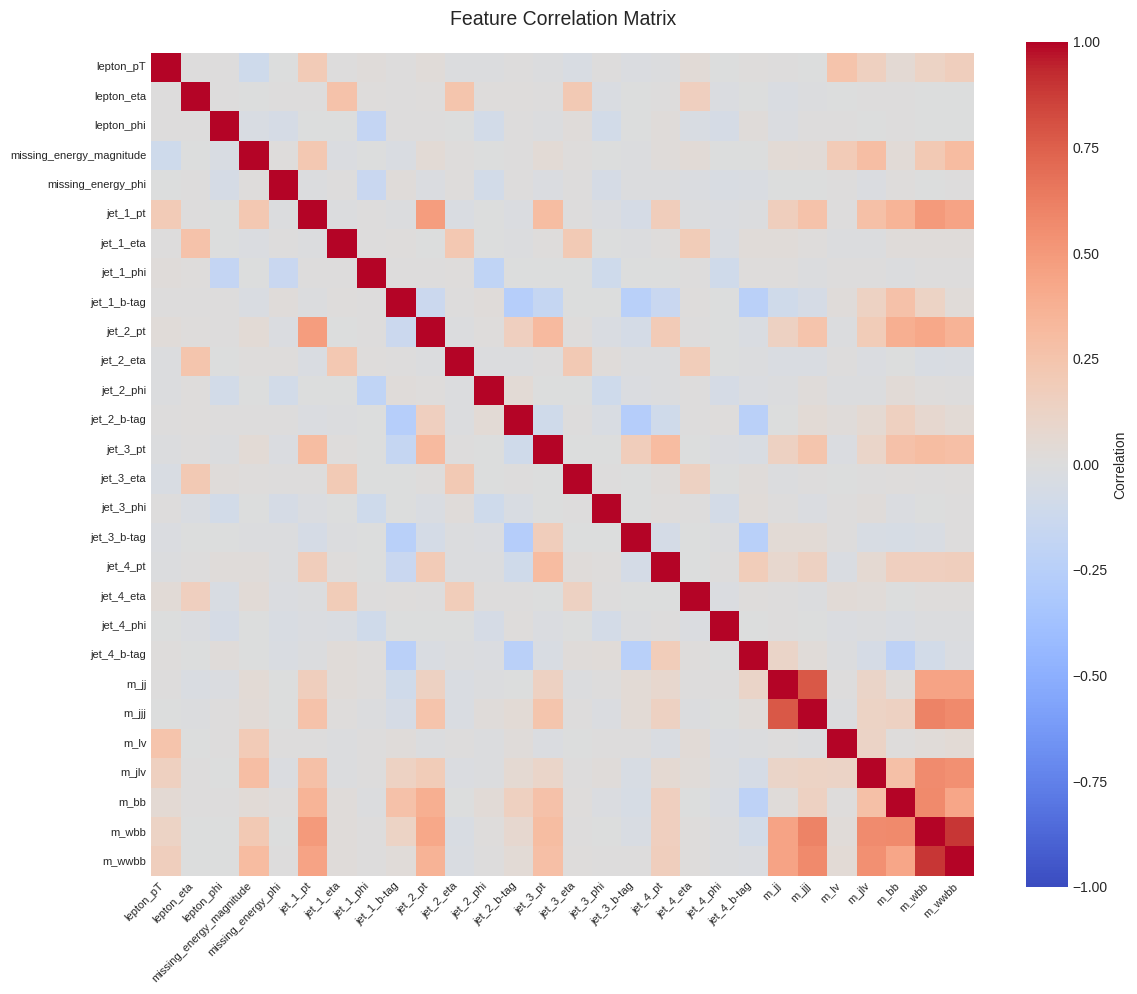

In [7]:
# Plot correlation matrix
plot_feature_correlation(
    X_train[:5000],  # Use subset for faster computation
    feature_names,
    save_path='../figures/feature_correlation.png'
)

## Feature Statistics

In [8]:
import pandas as pd

# Create DataFrame for better visualization
df_stats = pd.DataFrame({
    'Feature': feature_names,
    'Mean': X_train.mean(axis=0),
    'Std': X_train.std(axis=0),
    'Min': X_train.min(axis=0),
    'Max': X_train.max(axis=0)
})

print("Feature Statistics:")
print(df_stats.to_string(index=False))

Feature Statistics:
                 Feature          Mean  Std       Min       Max
               lepton_pT -9.580670e-17  1.0 -1.267641 10.385717
              lepton_eta -1.668110e-17  1.0 -2.410863  2.425069
              lepton_phi -3.962594e-17  1.0 -1.727169  1.730588
missing_energy_magnitude -1.047051e-16  1.0 -1.665135  9.396649
      missing_energy_phi  5.425105e-17  1.0 -1.727432  1.739844
                jet_1_pt -1.648636e-16  1.0 -1.798074 12.888249
               jet_1_eta -5.753592e-17  1.0 -2.929039  2.939695
               jet_1_phi  1.696282e-17  1.0 -1.722703  1.725742
             jet_1_b-tag -3.497137e-16  1.0 -0.969242  1.146891
                jet_2_pt -1.529632e-16  1.0 -1.619633 14.742186
               jet_2_eta  8.854029e-18  1.0 -2.895879  2.894340
               jet_2_phi -2.978728e-17  1.0 -1.732302  1.738066
             jet_2_b-tag -2.038592e-16  1.0 -0.954684  1.155990
                jet_3_pt -1.878497e-16  1.0 -1.490528 15.374847
               jet_3